Zadanie 1.

In [12]:
from nltk.tokenize import word_tokenize

file = open('article.txt', 'r')
text = file.read()

text = text.lower()

tokens = word_tokenize(text)
print(f"Liczba słów po tokenizacji: {len(tokens)}")

Liczba słów po tokenizacji: 1312


In [13]:
from nltk.corpus import stopwords


filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
print(f"Liczba słów po usunięciu stopwords: {len(filtered_tokens)}")

Liczba słów po usunięciu stopwords: 832


In [14]:
from nltk import FreqDist

freq_dist = FreqDist(filtered_tokens)

print(freq_dist.most_common(10))

[(',', 62), ('.', 47), ('’', 24), ('alzheimer', 20), ('gene', 15), ('disease', 11), ('“', 10), ('”', 10), ('says', 10), ('crispr', 9)]


In [27]:
import string
import numpy as np


stopwords_custom = stopwords.words('english')
stopwords_custom.extend(list(string.punctuation))
stopwords_custom.extend(['’', '“', '”', '—', 'e'])

tokens = word_tokenize(text)
filtered_tokens = [token for token in tokens if token not in stopwords_custom]
freq_dist = FreqDist(filtered_tokens)

print(f"Liczba słów po usunięciu rozszerzonych stopwords: {len(filtered_tokens)}")

Liczba słów po usunięciu rozszerzonych stopwords: 672


In [29]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

print(f"Liczba słów po lematyzacji: {len(lemmatized_tokens)}")

Liczba słów po lematyzacji: 672


In [31]:
from nltk.stem import ARLSTem

stemmer = ARLSTem()

stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
print(f"Liczba słów po stemmingu: {len(lemmatized_tokens)}")

Liczba słów po stemmingu: 672


<BarContainer object of 10 artists>

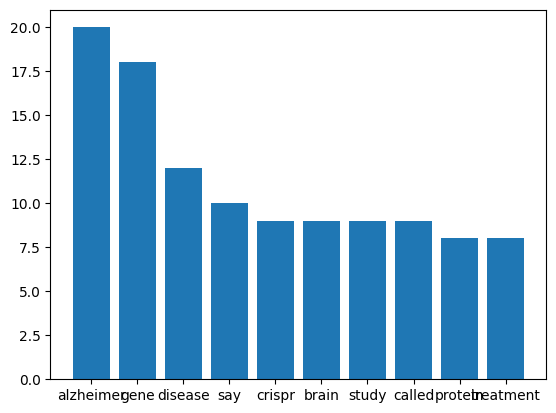

In [73]:
import matplotlib.pyplot as plt


fd = FreqDist(lemmatized_tokens)

most_common = np.array(fd.most_common(10))
plt.bar(most_common[:,0], [int(i) for i in most_common[:,1]], bottom=np.zeros(10))

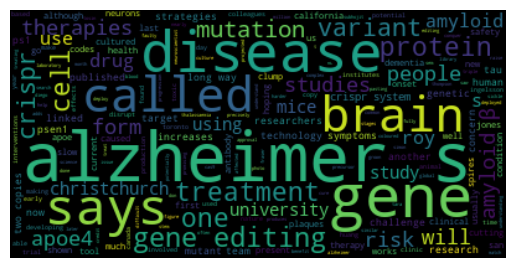

In [87]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text=text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Zadanie 2.

In [2]:
positive = """I can't say enough about this fantastic hotel!
#1 hotel ranking in Paris is very well deserved!

When we booked, we mentioned that we were coming to Paris to celebrate our daughter’s 18th birthday. As a surprise for her (and to us as well!), they left a wonderful arrangement of balloons on her bed (she was thrilled!), as well as macaroons and champagne for us later in the day. Such a nice touch!

Breakfast service was impeccable with many delicious offerings! Staff is absolutely first class with their hospitality!

Great location! In addition, it was a really nice feature to be able to stop in at other Astotel hotels during the day for a bathroom break and refreshments. It was fun to see how different each one was designed/decorated! Though I will say that Malte is our absolute favorite!

Can't wait to return to this wonderful hotel with it's first class service!!!!"""

negative = """Unfortunately not a great experience with this hotel... it was a tiny room, noisy hotel, rundown fittings and furniture, broken bathroom door handle, dodgy light fittings, broken shelves, one tiny pillow per person, not enough towels provided, a window looking out onto literally a wall of bird mess and don't expect to be spoken to nicely by one particular member of staff if you ask for additional towels or politely ask if different room is available... Paris is great and the area was quite nice but I definitely would not recommend this hotel..."""

In [91]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
print(positive)
ss = sid.polarity_scores(positive)
for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')

I can't say enough about this fantastic hotel!
#1 hotel ranking in Paris is very well deserved!

When we booked, we mentioned that we were coming to Paris to celebrate our daughter’s 18th birthday. As a surprise for her (and to us as well!), they left a wonderful arrangement of balloons on her bed (she was thrilled!), as well as macaroons and champagne for us later in the day. Such a nice touch!

Breakfast service was impeccable with many delicious offerings! Staff is absolutely first class with their hospitality!

Great location! In addition, it was a really nice feature to be able to stop in at other Astotel hotels during the day for a bathroom break and refreshments. It was fun to see how different each one was designed/decorated! Though I will say that Malte is our absolute favorite!

Can't wait to return to this wonderful hotel with it's first class service!!!!
compound: 0.9918, neg: 0.012, neu: 0.732, pos: 0.255, 

In [92]:
print(negative)
ss = sid.polarity_scores(negative)
for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')

Unfortunately not a great experience with this hotel... it was a tiny room, noisy hotel, rundown fittings and furniture, broken bathroom door handle, dodgy light fittings, broken shelves, one tiny pillow per person, not enough towels provided, a window looking out onto literally a wall of bird mess and don't expect to be spoken to nicely by one particular member of staff if you ask for additional towels or politely ask if different room is available... Paris is great and the area was quite nice but I definitely would not recommend this hotel...
compound: -0.6561, neg: 0.171, neu: 0.751, pos: 0.078, 

In [4]:
import text2emotion

emotions_pos = text2emotion.get_emotion(positive)
emotions_neg = text2emotion.get_emotion(negative)
print(emotions_pos)
print(emotions_neg)

{'Happy': 0.38, 'Angry': 0.05, 'Surprise': 0.38, 'Sad': 0.05, 'Fear': 0.14}
{'Happy': 0.18, 'Angry': 0.24, 'Surprise': 0.24, 'Sad': 0.06, 'Fear': 0.29}


In [3]:
positive = """I can't say enough about this fantastic hotel!
#1 hotel ranking in Paris is very well deserved!

When we booked, we mentioned that we were coming to Paris to celebrate our daughter’s 18th birthday. As a surprise for her (and to us as well!), they left a wonderful arrangement of balloons on her bed (she was thrilled!), as well as macaroons and champagne for us later in the day. Such a nice touch!

Breakfast service was impeccable with many delicious offerings! Staff is absolutely first class with their hospitality!

Great location! In addition, it was a really nice feature to be able to stop in at other wonderful Astotel hotels during the day for a good bathroom break and refreshments. It was fun to see how different each one was designed/decorated! Though I will say that Malte is our absolute favorite!

Can't wait to return to this wonderful hotel with it's first class great service!!!!"""

negative = """Unfortunately not a great experience with this hotel... it was a tiny disguisting room, noisy hotel, rundown fittings and furniture, broken bad bathroom door handle, dodgy, bad light fittings, broken shelves, one tiny pillow per person, not enough towels provided, a window looking out onto literally a wall of bird mess and don't expect to be spoken to nicely by one particular member of staff if you ask for additional towels or politely ask if different room is available... I definitely would not recommend this hotel... It was a nightmare. """

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
print(positive)
ss = sid.polarity_scores(positive)
for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')

I can't say enough about this fantastic hotel!
#1 hotel ranking in Paris is very well deserved!

When we booked, we mentioned that we were coming to Paris to celebrate our daughter’s 18th birthday. As a surprise for her (and to us as well!), they left a wonderful arrangement of balloons on her bed (she was thrilled!), as well as macaroons and champagne for us later in the day. Such a nice touch!

Breakfast service was impeccable with many delicious offerings! Staff is absolutely first class with their hospitality!

Great location! In addition, it was a really nice feature to be able to stop in at other wonderful Astotel hotels during the day for a good bathroom break and refreshments. It was fun to see how different each one was designed/decorated! Though I will say that Malte is our absolute favorite!

Can't wait to return to this wonderful hotel with it's first class great service!!!!
compound: 0.9948, neg: 0.012, neu: 0.691, pos: 0.298, 

In [5]:
print(negative)
ss = sid.polarity_scores(negative)
for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')

Unfortunately not a great experience with this hotel... it was a tiny disguisting room, noisy hotel, rundown fittings and furniture, broken bad bathroom door handle, dodgy, bad light fittings, broken shelves, one tiny pillow per person, not enough towels provided, a window looking out onto literally a wall of bird mess and don't expect to be spoken to nicely by one particular member of staff if you ask for additional towels or politely ask if different room is available... I definitely would not recommend this hotel... It was a nightmare. 
compound: -0.9612, neg: 0.259, neu: 0.688, pos: 0.053, 

In [6]:
import text2emotion

emotions_pos = text2emotion.get_emotion(positive)
emotions_neg = text2emotion.get_emotion(negative)
print(emotions_pos)
print(emotions_neg)

[nltk_data] Downloading package stopwords to /home/mk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{'Happy': 0.39, 'Angry': 0.04, 'Surprise': 0.39, 'Sad': 0.04, 'Fear': 0.13}
{'Happy': 0.06, 'Angry': 0.25, 'Surprise': 0.25, 'Sad': 0.06, 'Fear': 0.38}


Zadanie 3.

In [1]:
from Scweet.scweet import scrape
from Scweet.user import get_user_information, get_users_following, get_users_followers

In [2]:
data = scrape(words=['ukraine'],since='2023-12-01', until='2023-12-15', limit=100, from_account = None, interval=1, headless=False, display_type="Top", save_images=False, lang="en",
	resume=False, filter_replies=False, proximity=False, geocode="None")



looking for tweets between 2023-12-01 and 2023-12-02 ...
 path : https://twitter.com/search?q=(ukraine)%20until%3A2023-12-02%20since%3A2023-12-01%20lang%3Aen%20geocode%3ANone&src=typed_query
scroll  1
scroll  2
looking for tweets between 2023-12-02 and 2023-12-03 ...
 path : https://twitter.com/search?q=(ukraine)%20until%3A2023-12-03%20since%3A2023-12-02%20lang%3Aen%20geocode%3ANone&src=typed_query
scroll  1
scroll  2


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=119.0.6045.123)
Stacktrace:
#0 0x5638464175e3 <unknown>
#1 0x5638460da0b7 <unknown>
#2 0x5638460ae1b8 <unknown>
#3 0x5638461546ef <unknown>
#4 0x56384616a306 <unknown>
#5 0x56384614ecc3 <unknown>
#6 0x56384611a0e4 <unknown>
#7 0x56384611b0ae <unknown>
#8 0x5638463ddce1 <unknown>
#9 0x5638463e1b7e <unknown>
#10 0x5638463cb4b5 <unknown>
#11 0x5638463e27d6 <unknown>
#12 0x5638463aedbf <unknown>
#13 0x563846405748 <unknown>
#14 0x563846405917 <unknown>
#15 0x563846416773 <unknown>
#16 0x7f437fa93897 start_thread
#17 0x7f437fb1a6bc __clone3
